In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import sounddevice as sd

In [4]:
train_ds, test_ds = tfds.load('spoken_digit', split=['train[:75%]', 'train[:25%]'], shuffle_files=True, as_supervised=True)
train_ds_np = tfds.as_numpy(train_ds)
test_ds_np = tfds.as_numpy(test_ds)

x_train = [x for x, y in train_ds_np]
y_train = [y for x, y in train_ds_np]

x_test = [x for x, y in test_ds_np]
y_test = [y for x, y in test_ds_np]

print(f"{len(x_train)}, {len(x_test)}")
print(f"{len(y_train)}, {len(y_test)}")

Fs = 8000

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 33.92 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 25.36 url/s]
2025-03-14 16:45:20.518109: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Dataset spoken_digit downloaded and prepared to /home/hikari/tensorflow_datasets/spoken_digit/1.0.9. Subsequent calls will reuse this data.


2025-03-14 16:45:20.971373: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-03-14 16:45:21.540935: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-14 16:45:22.052512: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1875, 625
1875, 625


2025-03-14 16:45:22.583433: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Min Max Normalization (n_min => n_max)
n_min = 0
n_max = 1
norm_x_train = [(x - np.min(x)) / (np.max(x) - np.min(x)) for x in x_train]
norm_x_train = [x*(n_max-n_min)+n_min for x in norm_x_train]
norm_x_test = [(x - np.min(x)) / (np.max(x) - np.min(x)) for x in x_test]
norm_x_test = [x*(n_max-n_min)+n_min for x in norm_x_test]

In [6]:
def plot_signal(s, t, title='Signal - Time'):
    fig, axs = plt.subplots(1, 1)
    axs.plot(t, s, 'r')
    axs.set_title(title)
    axs.set_xlabel('Seconds')
    axs.set_ylabel('Amplitude')
    axs.grid(True, which='both', linestyle='--', alpha=0.5)

    fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.6)
    plt.show()

In [7]:
def plot_spectrum(S, f_S, title='Spectrum - Frequency'):
    fig, axs = plt.subplots(1, 1)
    axs.plot(f_S, (20*np.log10(np.abs(S))).clip(min=-9), 'k')
    axs.set_title(title)
    axs.set_xlabel('Hz')
    axs.set_ylabel('dB')
    axs.set_xscale('log')
    axs.grid(True, which='both', linestyle='--', alpha=0.5)

    fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.6)
    plt.show()

In [8]:
def plot_singal_and_spectrum(s, t, S, f_S, title1='Spectrum - Time', title2='Spectrum - Frequency'):
    fig, axs = plt.subplots(2, 1)

    axs[0].plot(t, s, 'r')
    axs[0].set_title(title1)
    axs[0].set_xlabel('Seconds')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True, which='both', linestyle='--', alpha=0.5)

    axs[1].plot(f_S, (20*np.log10(np.abs(S))).clip(min=-9), 'k')
    axs[1].set_title(title2)
    axs[1].set_xlabel('Hz')
    axs[1].set_ylabel('dB')
    axs[1].set_xscale('log')
    axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

    fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=.6)
    plt.show()

In [9]:
item_index = np.random.randint(0, len(y_train), size=1)[0]
#item_index = 515

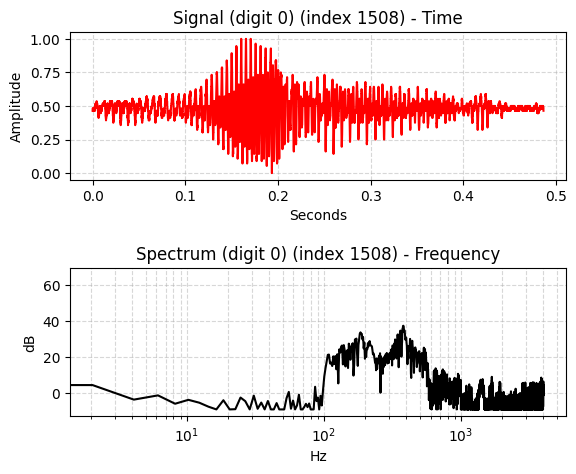

In [13]:
# Signal
s = norm_x_train[item_index]
t = np.array([i/Fs for i in range(0, len(norm_x_train[item_index]))])

# Spectrum Signal composed
S = np.fft.rfft(s)
f_S = np.fft.rfftfreq(t.size, d=1/Fs)

sd.play(s, Fs)

plot_singal_and_spectrum(s, t, S, f_S, title1=f'Signal (digit {y_train[item_index]}) (index {item_index}) - Time', title2=f'Spectrum (digit {y_train[item_index]}) (index {item_index}) - Frequency')